#  Assisting children while biking

### Gruppe 7: Maximilian Hörnis, Florian Schwarm, Dennis Rupprecht



## Motivation 
* Children are active participants in road traffic
* Traffic signs might not be obvious to them
* Handheld technology device (smartphones etc.) usage is prevalent among children 

## Idea

Recognize and classify traffic signs automatically and display them in
an easy to understand assistive technology for children, without distracting them.

## Problems


*   It is difficult to find the right boundaries for the colours
*   Other traffic signs are difficult to recognise with this method
*   Many rules have to be established and queried

## Task

* Recognize more signs
* Proof of the Problems

In [1]:
# Import some libs
import matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
#from google.colab.patches import cv2_imshow

## Selection from traffic signs:

In [2]:
image01 = plt.imread("img/01.png")
image02 = plt.imread("img/02.png")
image03 = plt.imread("img/03.png")
image04 = plt.imread("img/04.png")
image05 = plt.imread("img/05.png")
image06 = plt.imread("img/06.png")
image07 = plt.imread("img/07.png")
image08 = plt.imread("img/08.png")
image09 = plt.imread("img/09.png")
image10 = plt.imread("img/10.png")
image11 = plt.imread("img/11.png")
image12 = plt.imread("img/12.png")
image13 = plt.imread("img/13.png")
image14 = plt.imread("img/14.png")
image15 = plt.imread("img/15.png")
image16 = plt.imread("img/16.png")
image17 = plt.imread("img/17.png")
image18 = plt.imread("img/18.png")


images = [image01, image02, image03, image04, image05, image06, image07,
          image08, image09, image10, image11, image12, image13, image14,
          image15, image16, image17, image18]

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


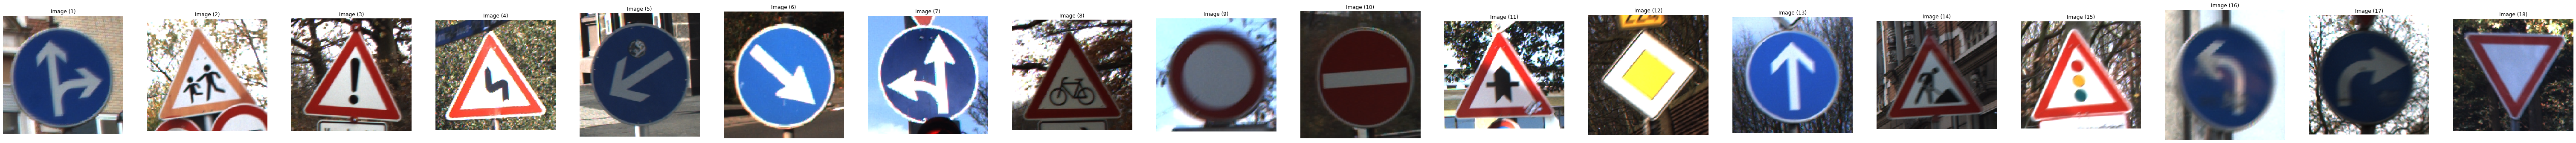

In [3]:
show_images(images)

## Recognize a stop sign

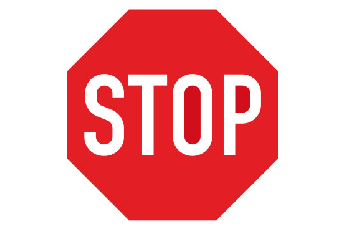

In [4]:
# Show a image
img = cv2.imread("img/stopsign.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure()
plt.axis("off")
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,threshold = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours and check if this has 8 nodes
for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 10000:  
        approx = cv2.approxPolyDP(cnt,  
                                  0.02 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx)==8:
            print("This is a stop sign!")
            cv2.drawContours(img,[cnt],0,(0,255,0),3)


This is a stop sign!


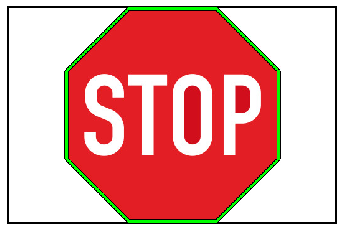

In [6]:
plt.imshow(img)
plt.axis("off")
cv2.waitKey(0)
cv2.destroyAllWindows()

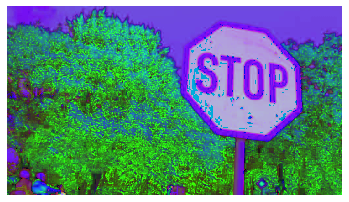

In [7]:
# Show a image
img = cv2.imread("img/test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
fig = plt.figure()
plt.axis("off")
plt.imshow(img_hsv)

In [8]:
# Define the colors.
lower_red = np.array([0,113,167])
upper_red = np.array([179,255,255])

mask = cv2.inRange(img_hsv, lower_red, upper_red)


output = cv2.bitwise_and(img, img, mask=mask)

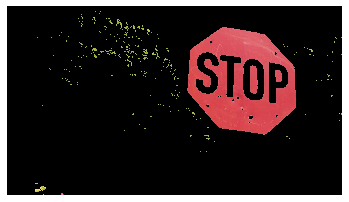

In [9]:
plt.axis("off")
plt.imshow(output)

In [10]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours and check if this has 8 nodes
for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 10000:  
        approx = cv2.approxPolyDP(cnt,  
                                  0.02 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(img, [approx], 0, (0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx)==8:
            print("This is a stop sign!")
            cv2.drawContours(img,[cnt],0,(0,255,0),3)
            

This is a stop sign!


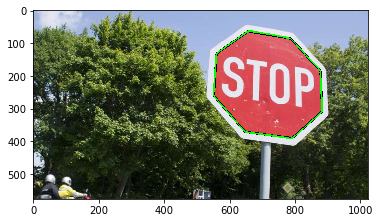

In [11]:
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Recognize more signs

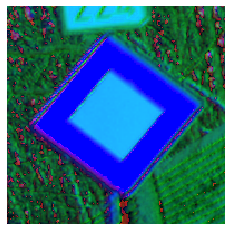

In [12]:
image12 = cv2.imread("img/12.png")
image12 = cv2.cvtColor(image12, cv2.COLOR_BGR2RGB)
image12_hsv = cv2.cvtColor(image12, cv2.COLOR_RGB2HSV)
fig = plt.figure()
plt.axis("off")
plt.imshow(image12_hsv)

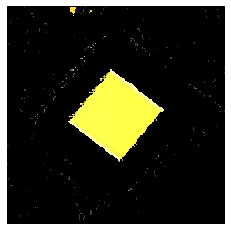

In [13]:
# Define the colors.
lower_yellow = np.array([25,50,50])
upper_yellow = np.array([32,255,255])

mask2 = cv2.inRange(image12_hsv, lower_yellow, upper_yellow)

output2 = cv2.bitwise_and(image12, image12, mask=mask2)

plt.axis("off")
plt.imshow(output2)

In [31]:
contours, _ = cv2.findContours(mask2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours and check if this has 8 nodes
for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 1000:  
        # approxPolyDP(image, epsilon, closed)
        # epsilon is the approximation accuracy/ specified precision
        # arcLength(image, closed) is the size of the image
        approx = cv2.approxPolyDP(cnt,  
                                  0.02 * cv2.arcLength(cnt, True), True) 
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        if len(approx)==4:
            print("This is a priority sign!")
            cv2.drawContours(image12,[cnt],0,(0,255,0),3)
        else:
            print("Nothing to see here")

This is a priority sign!


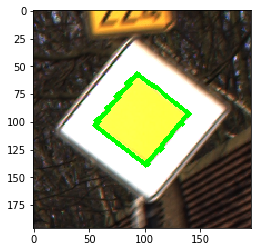

In [32]:
plt.imshow(image12)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
image06 = cv2.imread("img/06.png")
image06 = cv2.cvtColor(image06, cv2.COLOR_BGR2RGB)
image06_hsv = cv2.cvtColor(image06, cv2.COLOR_RGB2HSV)
# Define the colors.
lower_blue = np.array([0,160,160])
upper_blue = np.array([120,255,255])
mask3 = cv2.inRange(image06_hsv, lower_blue, upper_blue)

output3 = cv2.bitwise_and(image06, image06, mask=mask3)
output3_gray = cv2.cvtColor(output3, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(output3_gray, 5)
contours, _ = cv2.findContours(mask3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

17
Nothing to see here


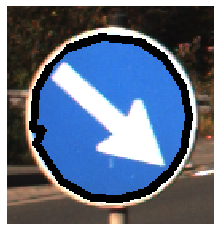

In [37]:
for cnt in contours:
    area = cv2.contourArea(cnt) 
    if area > 2000:  
        # approxPolyDP(image, epsilon, closed)
        # epsilon is the approximation accuracy/ specified precision
        # arcLength(image, closed) is the size of the image
        approx = cv2.approxPolyDP(cnt,  
                                   0.009 * cv2.arcLength(cnt, True), True) 
        cv2.drawContours(image06, [approx], 0, (0), 3)
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        print(len(approx))
        if len(approx)==0:
            print("This is a blue round sign!")
        else:
            print("Nothing to see here")
fig = plt.figure()
plt.axis("off")
plt.imshow(image06)

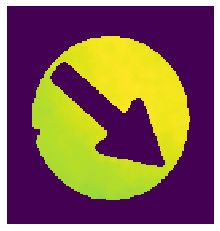

In [34]:
image06 = cv2.imread("img/06.png")
image06 = cv2.cvtColor(image06, cv2.COLOR_BGR2RGB)
image06_hsv = cv2.cvtColor(image06, cv2.COLOR_RGB2HSV)
fig = plt.figure()

# Define the colors.
lower_blue = np.array([0,160,160])
upper_blue = np.array([120,255,255])
mask3 = cv2.inRange(image06_hsv, lower_blue, upper_blue)

output3 = cv2.bitwise_and(image06, image06, mask=mask3)
output3_gray = cv2.cvtColor(output3, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(output3_gray, 5)
plt.axis("off")
plt.imshow(img_blur)


There is a blue round circle!


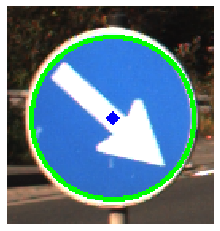

In [35]:
# HoughCircles(image, method, dp, min_dist,param1, param2, minRadius) https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_circle/hough_circle.html - https://www.youtube.com/watch?v=dp1r9oT_h9k 
# dp = The inverse ratio of resolution
# min_dist = distence between two center
# param_1 = Threshold for Canny edge detector
# param_2 = Threshold for center detection
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=10, minRadius=50)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(image06, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw center of the circle
        cv2.circle(image06, (i[0], i[1]), 2, (0, 0, 255), 3)
        print("There is a blue round circle!")
else:
    print("Nothing to see here!")
plt.axis("off")
plt.imshow(image06)

In [19]:
image_problem = cv2.imread("img/05.png")
image_problem = cv2.cvtColor(image_problem, cv2.COLOR_BGR2RGB)
image_problem_hsv = cv2.cvtColor(image_problem, cv2.COLOR_RGB2HSV)

# Define the colors.
lower_blue = np.array([0,160,160])
upper_blue = np.array([120,255,255])
mask4 = cv2.inRange(image_problem_hsv, lower_blue, upper_blue)

output4 = cv2.bitwise_and(image_problem, image_problem, mask=mask4)
output4_gray = cv2.cvtColor(output4, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(output4_gray, 5)
# HoughCircles(image, method, dp, min_dist,param1, param2, minRadius) https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_circle/hough_circle.html - https://www.youtube.com/watch?v=dp1r9oT_h9k 
# dp = The inverse ratio of resolution
# min_dist = distence between two center
# param_1 = Threshold for Canny edge detector
# param_2 = Threshold for center detection
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=10, minRadius=50)

Nothing to see here!


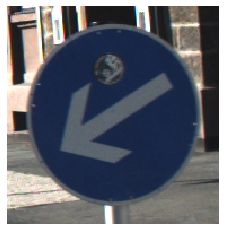

In [20]:

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(image_problem, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw center of the circle
        cv2.circle(image_problem, (i[0], i[1]), 2, (0, 0, 255), 3)
        print("This is a blue round circle!")
else:
    print("Nothing to see here!")
plt.axis("off")
plt.imshow(image_problem)

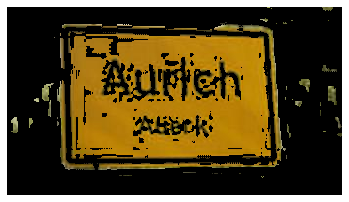

In [21]:
problem_test = cv2.imread("img/problem_test.jpg")
problem_test = cv2.cvtColor(problem_test, cv2.COLOR_BGR2RGB)
problem_test_hsv = cv2.cvtColor(problem_test, cv2.COLOR_RGB2HSV)
# Define the colors.
lower_yellow = np.array([20,50,50])
upper_yellow = np.array([32,255,255])

mask5 = cv2.inRange(problem_test_hsv, lower_yellow, upper_yellow)

output5 = cv2.bitwise_and(problem_test, problem_test, mask=mask5)

contours, _ = cv2.findContours(mask5, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.axis("off")
plt.imshow(output5)

This is a priority sign!
Nothing to see here


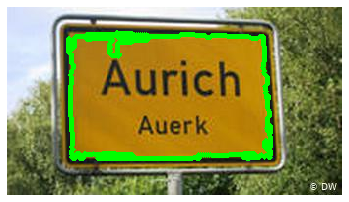

In [22]:
#draw contours and check if this has 8 nodes
for cnt in contours:
    area = cv2.contourArea(cnt) 
    # Shortlisting the regions based on there area. 
    if area > 1000:  
        # approxPolyDP(image, epsilon, closed)
        # epsilon is the approximation accuracy/ specified precision
        # arcLength(image, closed) is the size of the image
        approx = cv2.approxPolyDP(cnt,  
                                  0.02 * cv2.arcLength(cnt, True), True) 
        x = approx.ravel()[0]
        y = approx.ravel()[1]
        problem_test_1 = problem_test
        if len(approx)==4:
            print("This is a priority sign!")
            cv2.drawContours(problem_test,[cnt],0,(0,255,0),3)
        else:
            print("Nothing to see here")
fig = plt.figure()
plt.axis("off")
plt.imshow(problem_test)

## Problems
It is difficult to find the right boundaries for the colours

- blue signs: one detected, one not detected

Other traffic signs are difficult to recognise with this method


- yellow signs: both detected


Many rules have to be established and queried
  

 - if  red: 8 edges or (3 edges and (somthing in it or (nothing and reversed))) or round
 - if yellow: 4 edges and ...
 - if blue: round or 4 edges ...